# Oscillation forcée d'un chateau d'eau

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 14,
})

def generateBodeDiagram(beta, phi, wstart=0.00, wend=1.00, npts=100):
    fig, axs = plt.subplots(2,1,sharex=True,figsize=(10,10))

    w = np.linspace(wstart, wend, npts)
    betas = beta(w)
    axs[0].plot(w, betas,
        linewidth=2.5,color="green")
    phis = phi(w)
    axs[1].plot(w, -phis,
        linewidth=2.5,color="red")
    
    axs[0].set_ylabel("Coeff. d'amplification dynamique $\\beta$")
    axs[0].set_ylim(0.0, betas.max()*1.05)
    axs[0].grid(visible=True)
    axs[1].set_xlabel("Pulsation d'excitation $\\omega$ [rad/s]")
    axs[1].set_ylabel("Déphasage $-\\varphi$ [rad]")
    axs[1].grid(visible=True)
    axs[1].set_xlim(0.0, w.max())
    return fig, axs

## Description du problème

On se propose d'étudier le comportement vibratoire d'un chateau d'eau soumis à des sollicitations extérieures : mouvement du sol et vents forts.

![Illustration du problème](pictures/ChateauEau.png)

Le réservoir d'un volume $V = 400\,m^3$ est supporté par deux colonnes en béton, de longueur $L = 25\,m$ et de diamètre $d = 1.5\,m$. On suppose un mouvement harmonique du sol, ainsi que la présence de vents imposants un effort harmonique sur le réservoir.

**Rappels :**

* Le réservoir est modélisé à l'aide d'une masse ponctuelle relié à deux colonnes identiques,
* Les colonnes sont en béton, modélisé comme un matériau homogène élastique isotrope,
* Le comportement inertiel des colonnes est négligé.

### Données du problème :

| $L$     | $d$      | $E$       | $m$      | $f_{\mathrm{vent}}$ | $F_{\mathrm{vent}}$ | $f_{\mathrm{sol}}$ | $U_{\mathrm{sol}}$ |
|:-------:|:--------:|:---------:|:--------:|:-------------------:|:------------------:|:-------------------:|:------------------:|
| $25\,m$ | $1.5\,m$ | $30\,GPa$ | $400\,t$ | $0.5\,Hz$           | $100\,kN$    |   $1.0\,Hz$           | $0.05\,m$    | 

Le taux d'amortissement du système est estimé à $\zeta = 0.05$.

In [2]:
# Concrete pillar
L = 25.0 #   Length [m]
d =  1.5 # Diameter [m]
E = 30.0E9 # Young's modulus [Pa]
I = np.pi*d**4 / 64.0 # Second moment of area [m^4]

# Tank
m = 400.0E3 # Mass [kg]

### Oscillateur linéaire

Nous cherchons à décrire le problème à l'aide d'un système à 1 DDL masse-amortisseur-ressort. Pour cela, paramétrons le problème :

![Paramétrage du problème](pictures/TD2-parametrage.png)

Le réservoir bouge de manière horizontale. Les raideurs associées aux colonnes peuvent être obtenues à partir de résultat de ``résistance de matériaux''. Comme illustré, une colonne est sollicitée ainsi : les rotations aux extrémités sont bloquées, et un déplacement transverse est imposé. Ce problème hyperstatique peut être résolu à partir d'une méthode vue en première partie d'UE. En particulier, le déplacement en bout de poutre est donné par :
$$
    w = \frac{L^3}{12EI}F.
$$
On en déduit la raideur d'une colonne comme :
$$
    k_{\mathrm{pillar}} = \frac{F}{w} = \frac{12EI}{L^3}.
$$

Finalement, il est possible d'aborder le problème à partir d'un système à 1 DDL masse-ressort-amortisseur :

![Oscillateur linéaire](pictures/TD2-oscillateur.png)

Les efforts des colonnes sur la masse (comprendre "sur le réservoir") s'expriment comme :
$$
    F_x(colonnes\to{}masse) = F_x(colonne~1\to{}masse) + F_x(colonne~2\to{}masse)
$$
où :
$$
\begin{split}
    F_x(colonne~1\to{}masse) &= -k_{\mathrm{pillar}}(u(t) - u_{\mathrm{sol}}(t)) - c_{\mathrm{pillar}}(\dot{u}(t) - \dot{u}_{\mathrm{sol}}(t)) ,\\
    F_x(colonne~2\to{}masse) &= -k_{\mathrm{pillar}}(u(t) - u_{\mathrm{sol}}(t)) - c_{\mathrm{pillar}}(\dot{u}(t) - \dot{u}_{\mathrm{sol}}(t)).
\end{split}
$$
Ainsi, on peut directement identifier la raideur $k$ et le coefficient d'amortisseur $c$ du système masse-ressort-amortisseur final comme :
$$
    k = 2k_{\mathrm{pillar}} = \frac{24EI}{L^3},
    \quad
    c = \zeta\sqrt{mk}.
$$
Finalement, rappelons que la pulsation propre de notre problème s'exprime comme :
$$
    \omega_0 = \sqrt{\dfrac{k}{m}}.
$$

In [3]:
kpillar = 12.0*E*I/L**3
k = 2.0 * kpillar
zeta = 0.05

w0 = np.sqrt(k/m)
f0 = w0/2.0/np.pi
T0 = 1/f0
print("Fréquence propre du système : {0:.3f} Hz".format(f0))

Fréquence propre du système : 0.852 Hz


### Equation du mouvement

L'équation du mouvement peut être obtenu en écrivant l'équilibre dynamique de la masse :
$$
    m\ddot{u}(t) = F_x(colonnes\to{}masse) + F_x(vent\to{}masse).
$$
Nous obtenons :
$$
    m\ddot{u}(t) + c\dot{u}(t) + k{u}(t) = c\dot{u}_{\mathrm{sol}}(t) + ku_{\mathrm{sol}}(t) + f_{\mathrm{vent}}(t).
$$
Les mouvements du sol et les efforts du vent sont considérés harmoniques. Leurs actions mécaniques sont de la forme :
$$
\begin{split}
    u_{\mathrm{sol}}(t) &= U_{\mathrm{sol}} \cos(\omega_{\mathrm{sol}}t), \\
    f_{\mathrm{vent}}(t) &= F_{\mathrm{vent}} \cos(\omega_{\mathrm{vent}}t).
\end{split}
$$

Il est également possible de réécrire l'équation du mouvement à partir d'un mouvement relatif $u^*(t) = u(t) - u_{\mathrm{sol}}(t)$ de la masse par rapport au sol :
$$
    m\ddot{u}^*(t) + c\dot{u}^*(t) + k{u}^*(t) = -m\ddot{u}_{\mathrm{sol}}(t) + f_{\mathrm{vent}}(t).
$$

## Amplification dynamique

### Solution générale

Un point important à noter est que le réservoir est sollicité de deux manières (sol et vent) dans les pulsations d'excitation sont différentes. La réponse de la structure ne sera donc pas harmonique mais une combinaison de deux réponses harmoniques. On applique le principe de superposition. Ainsi, la solution stationnaire est de la forme :
$$
    u(t) = A \cos(\omega_{\mathrm{sol}}t - \varphi_A) + B \cos(\omega_{\mathrm{vent}}t - \varphi_B),
$$
où $A, \varphi_A, B, \varphi_B$ sont des constantes à déterminer.

Une façon ``simple'' d'obtenir ces constantes est d'appliquer la **méthode des complexes**. En d'autres termes, nous cherchons notre solution stationnaire sous la forme :
$$
    \mathfrak{u}(t) = \mathcal{A} \exp(i\omega_{\mathrm{sol}}t) + \mathcal{B} \exp(i\omega_{\mathrm{vent}}t),
$$
où $\mathcal{A}$ et $\mathcal{B}$ sont des complexes. Pour obtenir la solution dans $\R$, il s'agit d'appliquer les relations suivantes :
$$
    A = |\mathcal{A}|,
    \quad
    \varphi_A = -\arg{}{A},
    \quad
    B = |\mathcal{B}|,
    \quad
    \varphi_B = -\arg{}{B},
    \quad
    u(t) = \mathfrak{R}(\mathfrak{u}(t)).
$$

### Mouvement du support

Pour la composante de $u$ provenant du mouvement du support, il est plus simple d'utiliser l'équation du mouvement en déplacement relatif (cela donne une expression plus compacte).

Ainsi, on cherche $\mathfrak{u}_A^*(t) = \mathcal{A}^* \exp(i\omega_{\mathrm{sol}}t)$ solution de :
$$
    m\ddot{\mathfrak{u}}_A^*(t) + c\dot{\mathfrak{u}}_A^*(t) + k{\mathfrak{u}}_A^*(t) = -m\ddot{\mathfrak{u}}_{\mathrm{sol}}(t).
$$
Détaillons les termes présents dans cette équation :
$$
\begin{split}
    {\mathfrak{u}}_{\mathrm{sol}}(t) &= U_{\mathrm{sol}} \exp(i\omega_{\mathrm{sol}}t) \\
    \Rightarrow~~\ddot{\mathfrak{u}}_{\mathrm{sol}}(t) &= -\omega_{\mathrm{sol}}^2 U_{\mathrm{sol}} \exp(i\omega_{\mathrm{sol}}t)
    \\[10pt]
    \mathfrak{u}_A^*(t) &= \mathcal{A}^* \exp(i\omega_{\mathrm{sol}}t) \\
    \Rightarrow~~\dot{\mathfrak{u}}_A^*(t) &= (i\omega_{\mathrm{sol}})\mathcal{A}^* \exp(i\omega_{\mathrm{sol}}t) \\
    \Rightarrow~~\ddot{\mathfrak{u}}_A^*(t) &= -\omega_{\mathrm{sol}}^2\mathcal{A}^* \exp(i\omega_{\mathrm{sol}}t).
\end{split}
$$

En substituant ces expressions dans l'équation du mouvement, nous obtenons :
$$
    \big((k - m\omega_{\mathrm{sol}}^2) + ic\omega_{\mathrm{sol}}\big)\mathcal{A}^* =
    m\omega_{\mathrm{sol}}^2 U_{\mathrm{sol}}.
$$
Nous pouvons diviser les termes de droite et de gauche par $k$ :
$$
    \big((1 - \frac{m}{k}\omega_{\mathrm{sol}}^2) + i\frac{c}{k}\omega_{\mathrm{sol}}\big)\mathcal{A}^* =
    \omega_{\mathrm{sol}}^2 \frac{m}{k}U_{\mathrm{sol}}.
$$
La pulsation propre étant donné par $\omega_0 = \sqrt{k/m}$ et le taux d'amortissement par $\zeta = c/(2\sqrt{km})$, nous obtenons :
$$
    \big((1 - (\omega_{\mathrm{sol}}/\omega_0)^2) + 2i\zeta\omega_{\mathrm{sol}}/\omega_0\big)\mathcal{A}^* =
    (\omega_{\mathrm{sol}}/\omega_0)^2 U_{\mathrm{sol}}.
$$

L'expression de l'amplitude dynamique complexe est :
$$
\boxed{
    \mathcal{A}^*(\omega_{\mathrm{sol}})
    = 
    U_{\mathrm{sol}} 
    \frac{(\omega_{\mathrm{sol}}/\omega_0)^2}{(1 - (\omega_{\mathrm{sol}}/\omega_0)^2) + 2i\zeta\omega_{\mathrm{sol}}/\omega_0}.
}
$$

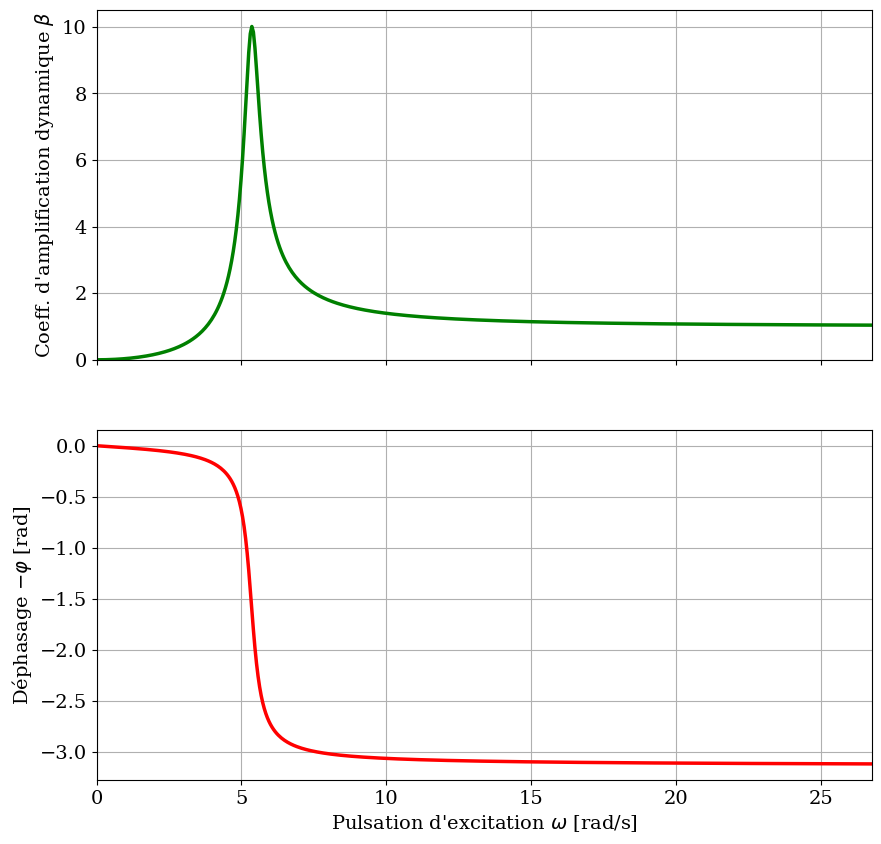

In [4]:
def betaUrel(wgr:float):
    return np.absolute((wgr/w0)**2 / (1-(wgr/w0)**2 + 2.0j*zeta*wgr/w0))
def phiUrel(wgr:float):
    return -np.angle((wgr/w0)**2 / (1-(wgr/w0)**2 + 2.0j*zeta*wgr/w0))

fig, axs = generateBodeDiagram(beta=betaUrel, phi=phiUrel, 
                               wstart=0.00, wend=5*w0, npts=500)

Nous pouvons en déduire l'amplification dynamique en déplacement total également :
$$
\begin{split}
    \mathfrak{u}_A(t) 
    &= \mathfrak{u}_A^*(t) + \mathfrak{u}_{\mathrm{sol}}(t) \\
    &= \mathcal{A}^* \exp(i\omega_{\mathrm{sol}}t) + {U}_{\mathrm{sol}} \exp(i\omega_{\mathrm{sol}}t) \\
    &= \underbrace{(\mathcal{A}^* + {U}_{\mathrm{sol}})}_{\displaystyle\mathcal{A}}\exp(i\omega_{\mathrm{sol}}t).
\end{split}
$$
Ainsi, par identification :
$$
\boxed{
    \mathcal{A}(\omega_{\mathrm{sol}})
    =
    \mathcal{A}^*(\omega_{\mathrm{sol}}) + {U}_{\mathrm{sol}}
    =
    {U}_{\mathrm{sol}}\left(
        \frac{(\omega_{\mathrm{sol}}/\omega_0)^2}{(1 - (\omega_{\mathrm{sol}}/\omega_0)^2) + 2i\zeta\omega_{\mathrm{sol}}/\omega_0} + 1
    \right)
    .
}
$$

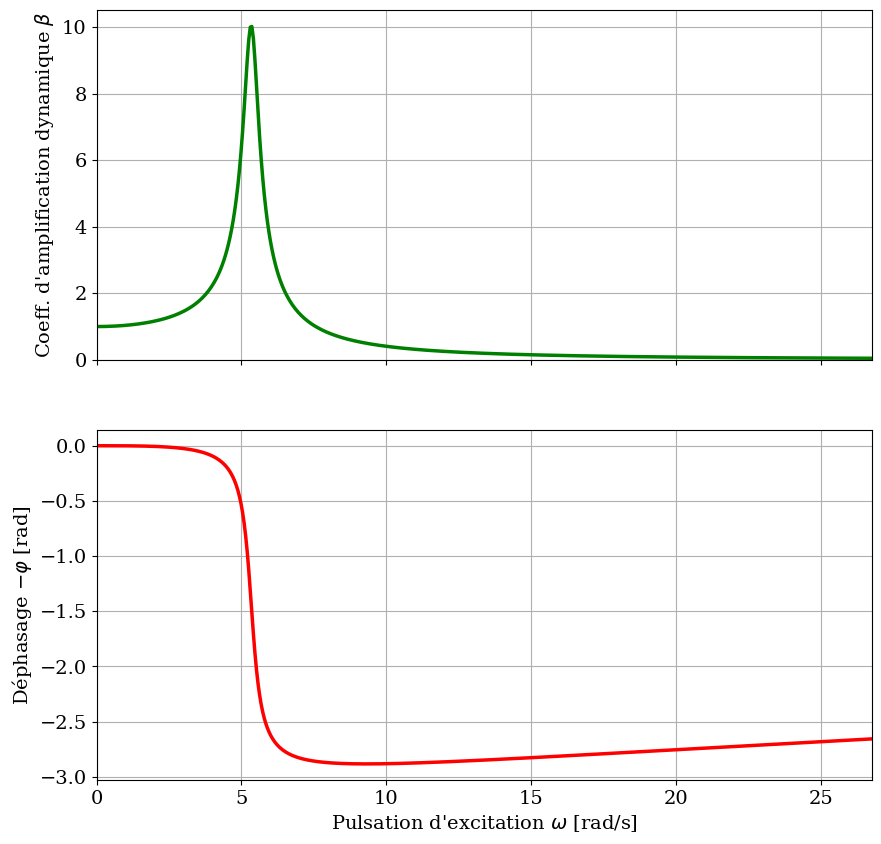

In [5]:
def betaUtot(wgr:float):
    return np.absolute((wgr/w0)**2 / (1-(wgr/w0)**2 + 2.0j*zeta*wgr/w0) + 1)
def phiUtot(wgr:float):
    return -np.angle((wgr/w0)**2/(1 - (wgr/w0)**2 + 2*1j*zeta*wgr/w0) + 1)

fig, axs = generateBodeDiagram(beta=betaUtot, phi=phiUtot, 
                               wstart=0.00, wend=5*w0, npts=500)

### Action du vent

Le raisonnement pour obtenir la seconde amplitude complexe $\mathcal{B}$ associée à l'action du vent est similaire.

Ainsi, on cherche $\mathfrak{u}_B(t) = \mathcal{B} \exp(i\omega_{\mathrm{vent}}t)$ solution de :
$$
    m\ddot{\mathfrak{u}}_B(t) + c\dot{\mathfrak{u}}_B(t) + k{\mathfrak{u}}_B(t) = {F}_{\mathrm{vent}}\exp(i\omega_{\mathrm{vent}}t).
$$

Nous obtenons :
$$
\boxed{
    \mathcal{B}(\omega_{\mathrm{vent}})
    =
    U_{\mathrm{vent}} 
    \frac{1}{(1 - (\omega_{\mathrm{vent}}/\omega_0)^2) + 2i\zeta\omega_{\mathrm{vent}}/\omega_0},
    \quad
    U_{\mathrm{vent}} = {F_{\mathrm{vent}}}/{k}.
}
$$

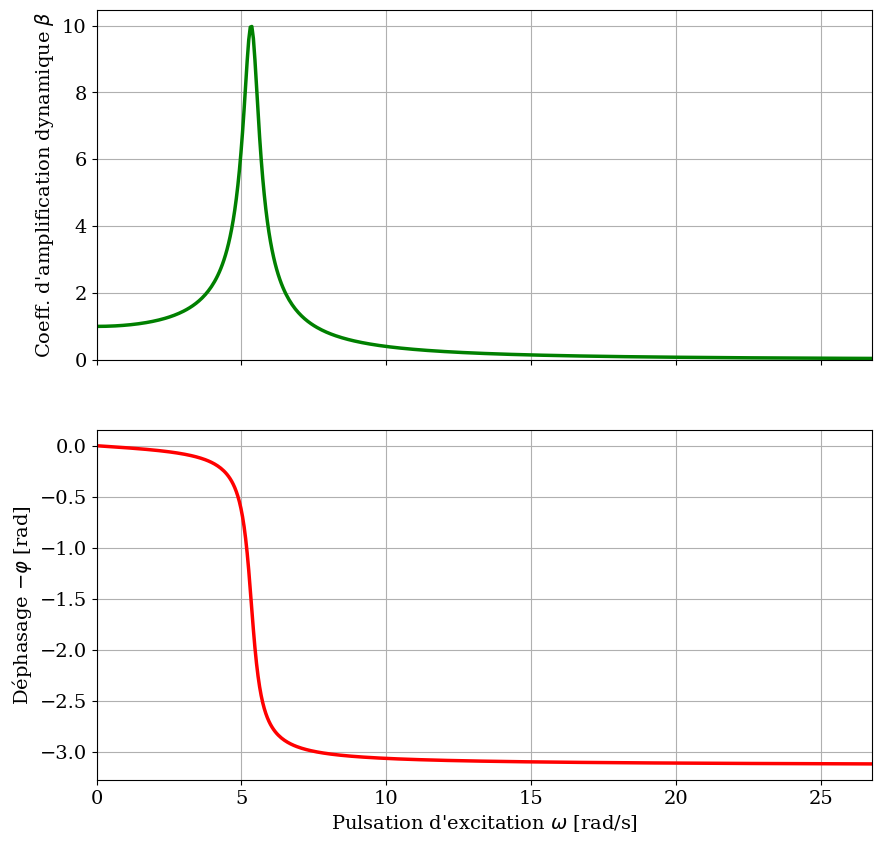

In [6]:
def betaF(wf:float):
    return np.absolute(1.0 / (1-(wf/w0)**2 + 2.0j*zeta*wf/w0))
def phiF(wf:float):
    return -np.angle(1.0 / (1-(wf/w0)**2 + 2.0j*zeta*wf/w0))

fig, axs = generateBodeDiagram(beta=betaF, phi=phiF, 
                               wstart=0.00, wend=5*w0, npts=500)

## Réponse temporelle

Comme évoquer, la réponse temporelle du réservoir est identifiée en prenant la partie réelle de la solution complexe. Nous obtenons :
$$
    u(t) = A \cos(\omega_{\mathrm{sol}}t - \varphi_A) + B \cos(\omega_{\mathrm{vent}}t - \varphi_B).
$$
Les amplitudes $A, B$ et les déphasages $\varphi_A, \varphi_B$ sont obtenus en évaluant les amplitudes complexes $\mathcal{A}$ et $\mathcal{B}$ aux pulsations d’excitation (ici $\omega_{\mathrm{sol}} = 2\pi f_{\mathrm{sol}} \approx 3.14\, \mathrm{rad/s}$ et $\omega_{\mathrm{vent}} = 2\pi f_{\mathrm{vent}} \approx 6.28\, \mathrm{rad/s}$).

### Régime établi

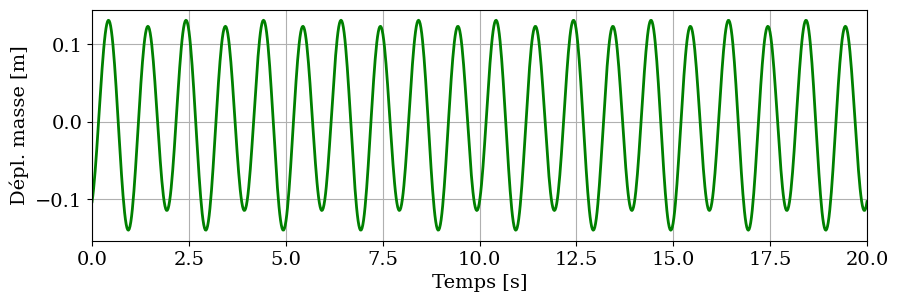

In [11]:
fsol = 1.0 # Fréquence vib sol [Hz]
Usol = 0.05 # Amplitude disp vib sol [m]

fvent = 0.5 # Fréquence vib vent [Hz]
Fvent = 100.0E3 # Amplitude effort vib vent [N]


Ustat = Fvent / k

wgr = 2.0 * np.pi * fsol
betagr = betaUtot(wgr)
phigr = phiUtot(wgr)
wf = 2.0 * np.pi * fvent
betaf = betaF(wf)
phif = phiF(wf)

t = np.linspace(0,10/fvent, 1000)
u1 = Usol * betagr * np.cos(wgr*t - phigr)
u2 = Ustat * betaf * np.cos(wf*t - phif)

fig, ax = plt.subplots(1,1,sharex=True, sharey=True,figsize=(10,3))

ax.plot(t, u1+u2, color="green", linestyle="solid", linewidth=2)
ax.grid(True)
ax.set_xlim(0,t.max())
ax.set_xlabel("Temps [s]")
ax.set_ylabel("Dépl. masse [m]")
plt.show()

### Avec conditions initiales

Nous pouvons également considérer la solution globale, à partir de l'instant initial $t=0$, et pas uniquement la solution stationnaire étudiée précédemment.

En d'autres termes, il s'agit de résoudre le problème suivant faisant intervenir les conditions initiales :
$$
\left\{
\begin{array}{l}
    m\ddot{u}(t) + c\dot{u}(t) + k{u}(t) = c\dot{u}_{\mathrm{sol}}(t) + ku_{\mathrm{sol}}(t) + f_{\mathrm{vent}}(t), \forall{}t, \\
    \dot{u}(t=0) = \dot{u}_0,\\
    {u}(t=0) = {u}_0.
\end{array}
\right.
$$

Pour rappel, la solution de l'équation homogène est de la forme :
$$
    u_h(t) = \big(\bar{A}\cos(\omega_p t) + \bar{B}\sin(\omega_p t)\big)\exp(\zeta\omega_0 t),
$$
où $\bar{A}$ et $\bar{B}$ sont deux constantes à déterminer à partir des conditions initiales.
 
La solution globale s'écrit :
$$
\begin{split}
    u(t) 
    &= \big(\bar{A}\cos(\omega_p t) + \bar{B}\sin(\omega_p t)\big)\exp(\zeta\omega_0 t) \\
    &+ A \cos(\omega_{\mathrm{sol}}t - \varphi_A) + B \cos(\omega_{\mathrm{vent}}t - \varphi_B).
\end{split}
$$
Remarque : $A, B, \varphi_A, \varphi_B$ ne sont pas des constantes à déterminer. Elles sont connues et ont été déterminées en cherchant la solution stationnaire.

Considérons le cas où le réservoir à l'instant $t=0$ est au repos :
$$
    u_0 = 0,\quad
    \dot{u}_0 = 0.
$$
Par identification, nous obtenons :
$$
\begin{split}
    \bar{A}
    &=
    -A\cos(-\varphi_A) -B\cos(-\varphi_B),
    \\
    \bar{B}
    &=
    \frac{1}{\omega_p}
    \big(
    \omega_{\mathrm{sol}}A\sin(-\varphi_A) 
    + \omega_{\mathrm{vent}}B\cos(-\varphi_B)
    + \bar{A}\zeta\omega_0
    \big).
\end{split}
$$

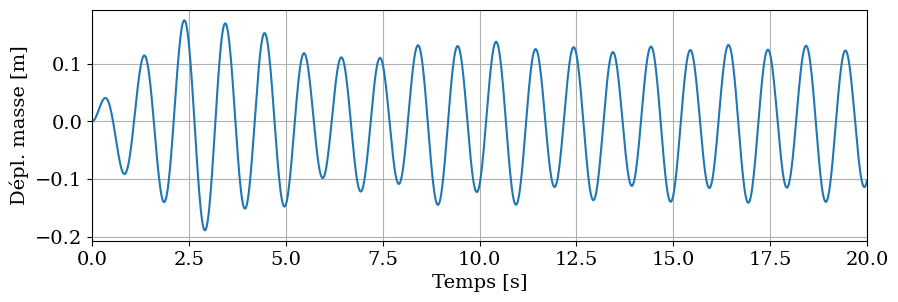

In [8]:
wp = w0 * np.sqrt(1 - zeta**2)

A = - Usol * betagr * np.cos(-phigr) - Ustat * betaf * np.cos(-phif)
B = ( wgr*Usol*betagr*np.sin(-phigr) + wf*Ustat*betaf*np.sin(-phif) + A*zeta*w0 )/wp

ut = u1 + u2 + (A*np.cos(wp*t) + B*np.sin(wp*t))*np.exp(-zeta*w0*t)

fig, ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(t, ut)
ax.grid(True)
ax.set_xlim(0,t.max())
ax.set_xlabel("Temps [s]")
ax.set_ylabel("Dépl. masse [m]")
plt.show()